In [1]:
import pandas as pd

# Load both training CSVs
train_df1 = pd.read_csv("output/sample_training_1.csv")
train_df2 = pd.read_csv("output/sample_training_2.csv")

# Concatenate training DataFrames
train_df = pd.concat([train_df1, train_df2], ignore_index=True)

# Load validation data
val_df = pd.read_csv("output/sample_validation.csv")

# Check structure
print("Training Data:\n", train_df.head(), "\n")
print("Validation Data:\n", val_df.head(), "\n")


Training Data:
    note_id                                               text
0    10997  male patient in fifties prescribed no drugs\n\...
1    11339  male patient in fifties prescribed no drugs\n\...
2    11834  male patient in fifties prescribed Metoprolol,...
3  1261107  male patient in eighties prescribed NS, Syring...
4  1261284  male patient in seventies prescribed Metoprolo... 

Validation Data:
    note_id                                               text
0  1280230  female patient in sixties prescribed no drugs\...
1  1286616  male patient in fifties prescribed no drugs\n\...
2  1291281  female patient in seventies prescribed no drug...
3  1293851  female patient in seventies prescribed Nitrogl...
4  1295870  male patient in seventies prescribed Pantopraz... 



In [2]:
print("Training Data Columns:", train_df.columns)
print("Validation Data Columns:", val_df.columns)


Training Data Columns: Index(['note_id', 'text'], dtype='object')
Validation Data Columns: Index(['note_id', 'text'], dtype='object')


In [3]:
import pandas as pd
import json

# Load the training data (CSV)
train_df1 = pd.read_csv("output/sample_training_1.csv")
train_df2 = pd.read_csv("output/sample_training_2.csv")
train_df = pd.concat([train_df1, train_df2], ignore_index=True)

# Load both Insomnia label JSONs
with open("data/training/subtask_1/training_1.json", "r") as f1, open("data/training/subtask_1/training_2.json", "r") as f2:
    insomnia_labels_1 = json.load(f1)
    insomnia_labels_2 = json.load(f2)

# Combine the two dictionaries
combined_labels = {**insomnia_labels_1, **insomnia_labels_2}

# Convert combined labels to DataFrame
insomnia_df = pd.DataFrame.from_dict(combined_labels, orient="index").reset_index()
insomnia_df.columns = ["note_id", "Insomnia"]

# Convert `note_id` to int for merging
insomnia_df["note_id"] = insomnia_df["note_id"].astype(int)
train_df["note_id"] = train_df["note_id"].astype(int)

# Merge training data with labels
train_df = train_df.merge(insomnia_df, on="note_id", how="left")

# Display the first few rows
print(train_df.head())



   note_id                                               text Insomnia
0    10997  male patient in fifties prescribed no drugs\n\...       no
1    11339  male patient in fifties prescribed no drugs\n\...       no
2    11834  male patient in fifties prescribed Metoprolol,...      yes
3  1261107  male patient in eighties prescribed NS, Syring...      yes
4  1261284  male patient in seventies prescribed Metoprolo...      yes


In [4]:
count = 0
for i in range(70):
    if train_df['Insomnia'][i] == "yes":
        count += 1
print(count)

47


In [5]:
# Load the validation data (CSV)
val_df = pd.read_csv("output/sample_validation.csv")

# Load the validation labels (JSON)
with open("data/validation/subtask_1/validation.json", "r") as f:
    val_labels = json.load(f)

# Convert JSON to DataFrame
val_labels_df = pd.DataFrame.from_dict(val_labels, orient="index").reset_index()
val_labels_df.columns = ["note_id", "Insomnia"]

# Convert `note_id` to int for merging
val_labels_df["note_id"] = val_labels_df["note_id"].astype(int)
val_df["note_id"] = val_df["note_id"].astype(int)

# Merge validation data with labels
val_df = val_df.merge(val_labels_df, on="note_id", how="left")

# Display the first few rows
print(val_df.head())


   note_id                                               text Insomnia
0  1280230  female patient in sixties prescribed no drugs\...       no
1  1286616  male patient in fifties prescribed no drugs\n\...      yes
2  1291281  female patient in seventies prescribed no drug...       no
3  1293851  female patient in seventies prescribed Nitrogl...      yes
4  1295870  male patient in seventies prescribed Pantopraz...      yes


In [6]:
count = 0
for i in range(20):
    if val_df['Insomnia'][i] == "yes":
        count += 1
print(count)

12


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join back into a string
    return " ".join(words)

# Apply preprocessing to both training and validation data
train_df["clean_text"] = train_df["text"].apply(preprocess_text)
val_df["clean_text"] = val_df["text"].apply(preprocess_text)

# Display sample processed text
print(train_df[["text", "clean_text"]].head())


[nltk_data] Downloading package punkt to C:\Users\Anant
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anant
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anant
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Anant
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  male patient in fifties prescribed no drugs\n\...   
1  male patient in fifties prescribed no drugs\n\...   
2  male patient in fifties prescribed Metoprolol,...   
3  male patient in eighties prescribed NS, Syring...   
4  male patient in seventies prescribed Metoprolo...   

                                          clean_text  
0  male patient fifty prescribed drug admission d...  
1  male patient fifty prescribed drug admission d...  
2  male patient fifty prescribed metoprolol insul...  
3  male patient eighty prescribed n syringe ketor...  
4  male patient seventy prescribed metoprolol lev...  


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1, 2),         # Unigrams and bigrams
    min_df=3,                   # Remove rare words
    max_df=0.8                  # Remove overly frequent words
)

# Fit on training data and transform both train & validation data
X_train = vectorizer.fit_transform(train_df["clean_text"])
X_val = vectorizer.transform(val_df["clean_text"])

# Convert labels to binary (0 for "no", 1 for "yes")
y_train = train_df["Insomnia"].map({"no": 0, "yes": 1})
y_val = val_df["Insomnia"].map({"no": 0, "yes": 1})

# Print shape of transformed data
print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_val.shape}")


Training Data Shape: (70, 2104)
Validation Data Shape: (20, 2104)


## Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error
import pandas as pd
import numpy as np

# Train model with class weighting
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_val)

# Evaluation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Official metric: F1 score with 1 as positive class
f1_yes = f1_score(y_val, y_pred, pos_label=1)
print("\nF1-score (yes as positive class):", f1_yes)

# Mean Squared Error (treating labels as numeric)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error (MSE):", mse)

# Classification error rate (proportion of incorrect predictions)
error_rate = np.mean(y_val != y_pred)
print("Classification Error Rate:", error_rate)

# Error analysis
print("\n--- Error Analysis ---")

# 1. Indices of misclassified samples
misclassified_indices = np.where(y_val != y_pred)[0]
print(f"Total Misclassified Samples: {len(misclassified_indices)}")

# 2. Distribution of predictions
unique, counts = np.unique(y_pred, return_counts=True)
prediction_distribution = dict(zip(unique, counts))
print("Prediction Distribution:", prediction_distribution)

# 3. False positives and false negatives
false_positives = np.where((y_val == 0) & (y_pred == 1))[0]
false_negatives = np.where((y_val == 1) & (y_pred == 0))[0]

print(f"False Positives (predicted yes, actually no): {len(false_positives)}")
print(f"False Negatives (predicted no, actually yes): {len(false_negatives)}")

# 4. Display sample misclassified entries (if X_val is a DataFrame)
if isinstance(X_val, pd.DataFrame):
    print("\nSample False Positives:")
    display(X_val.iloc[false_positives[:5]])
    
    print("\nSample False Negatives:")
    display(X_val.iloc[false_negatives[:5]])


Validation Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.71      0.83      0.77        12

    accuracy                           0.70        20
   macro avg       0.69      0.67      0.67        20
weighted avg       0.70      0.70      0.69        20

Confusion Matrix:
 [[ 4  4]
 [ 2 10]]

F1-score (yes as positive class): 0.7692307692307693
Mean Squared Error (MSE): 0.3
Classification Error Rate: 0.3

--- Error Analysis ---
Total Misclassified Samples: 6
Prediction Distribution: {0: 6, 1: 14}
False Positives (predicted yes, actually no): 4
False Negatives (predicted no, actually yes): 2


## SVC

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# Train SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_pred_svm))
print("Classification Report:\n", classification_report(y_val, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))

# Official metric: F1 score with 1 as positive class  (as 1 for "yes")
f1_yes = f1_score(y_val, y_pred_svm, pos_label=1)
print("\nF1-score (yes as positive class):", f1_yes)

# Mean Squared Error (treating labels as numeric)
mse = mean_squared_error(y_val, y_pred_svm)
print("Mean Squared Error (MSE):", mse)

# Classification error rate (proportion of incorrect predictions)
error_rate = np.mean(y_val != y_pred_svm)
print("Classification Error Rate:", error_rate)


Validation Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.69      0.75      0.72        12

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20

Confusion Matrix:
 [[4 4]
 [3 9]]

F1-score (yes as positive class): 0.72
Mean Squared Error (MSE): 0.35
Classification Error Rate: 0.35


## XGBoost

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# Set scale_pos_weight to balance classes (Ratio of negative to positive class)
scale_pos_weight = len(y_train) / sum(y_train == 1)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=150, max_depth=10, scale_pos_weight=scale_pos_weight, random_state=42, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_xgb))

# Official metric: F1 score with 1 as positive class  (as 1 for "yes")
f1_yes = f1_score(y_val, y_pred_xgb, pos_label=1)
print("\nF1-score (yes as positive class):", f1_yes)

# Mean Squared Error (treating labels as numeric)
mse = mean_squared_error(y_val, y_pred_xgb)
print("Mean Squared Error (MSE):", mse)

# Classification error rate (proportion of incorrect predictions)
error_rate = np.mean(y_val != y_pred_xgb)
print("Classification Error Rate:", error_rate)


Validation Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.79      0.92      0.85        12

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20

Confusion Matrix:
 [[ 5  3]
 [ 1 11]]

F1-score (yes as positive class): 0.8461538461538461
Mean Squared Error (MSE): 0.2
Classification Error Rate: 0.2


## AdaBoostClassifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error

# Train AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=1, random_state=42, learning_rate=0.01)
ada_model.fit(X_train, y_train)

# Predict on validation set
y_pred_ada = ada_model.predict(X_val)

# Evaluation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_pred_ada))
print("Classification Report:\n", classification_report(y_val, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_ada))

# Official metric: F1 score with 1 as positive class  (as 1 for "yes")
f1_yes = f1_score(y_val, y_pred_ada, pos_label=1)
print("\nF1-score (yes as positive class):", f1_yes)

# Mean Squared Error (treating labels as numeric)
mse = mean_squared_error(y_val, y_pred_ada)
print("Mean Squared Error (MSE):", mse)

# Classification error rate (proportion of incorrect predictions)
error_rate = np.mean(y_val != y_pred_ada)
print("Classification Error Rate:", error_rate)


Validation Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.75      1.00      0.86        12

    accuracy                           0.80        20
   macro avg       0.88      0.75      0.76        20
weighted avg       0.85      0.80      0.78        20

Confusion Matrix:
 [[ 4  4]
 [ 0 12]]

F1-score (yes as positive class): 0.8571428571428571
Mean Squared Error (MSE): 0.2
Classification Error Rate: 0.2


c:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## KNN 

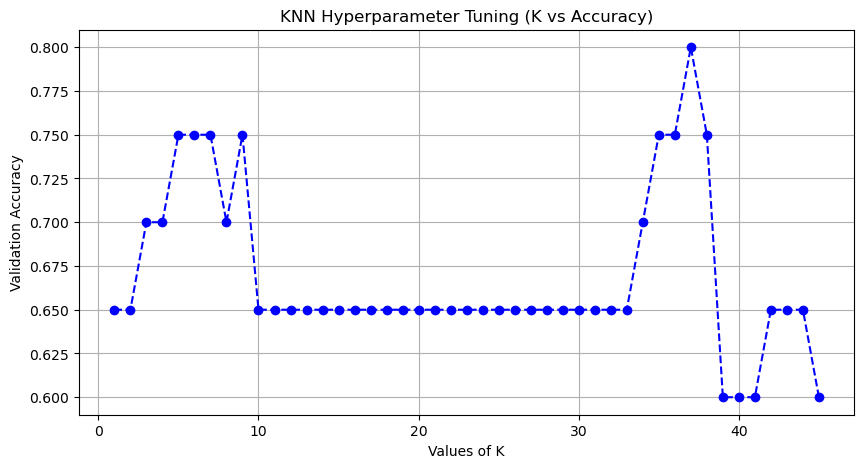

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_val_dense = X_val.toarray() if hasattr(X_val, "toarray") else X_val

ks = list(range(1, min(46, len(X_train_dense) + 1)))  # Ensure k ≤ 45
k_values = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_dense, y_train)  # Fit using dense array
    k_values.append(knn.score(X_val_dense, y_val))  # Validation accuracy

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(ks, k_values, marker='o', linestyle='dashed', color='b')
plt.xlabel("Values of K")
plt.ylabel("Validation Accuracy")
plt.title("KNN Hyperparameter Tuning (K vs Accuracy)")
plt.grid()
plt.show()


In [18]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=37) 
knn_model.fit(X_train, y_train)

# Predict on validation set
y_pred_knn = knn_model.predict(X_val)

# Evaluation metrics
print("Validation Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Classification Report:\n", classification_report(y_val, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

# Official metric: F1 score with 1 as positive class  (as 1 for "yes")
f1_yes = f1_score(y_val, y_pred_knn, pos_label=1)
print("\nF1-score (yes as positive class):", f1_yes)

# Mean Squared Error (treating labels as numeric)
mse = mean_squared_error(y_val, y_pred_knn)
print("Mean Squared Error (MSE):", mse)

# Classification error rate (proportion of incorrect predictions)
error_rate = np.mean(y_val != y_pred_knn)
print("Classification Error Rate:", error_rate)



Validation Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.75      1.00      0.86        12

    accuracy                           0.80        20
   macro avg       0.88      0.75      0.76        20
weighted avg       0.85      0.80      0.78        20

Confusion Matrix:
 [[ 4  4]
 [ 0 12]]

F1-score (yes as positive class): 0.8571428571428571
Mean Squared Error (MSE): 0.2
Classification Error Rate: 0.2


## Testing 

In [10]:
import pandas as pd
import json

# ===== Test Data Evaluation for Subtask 1 =====

# Load test data
test_df = pd.read_csv('./output/test.csv')  # Adjust path if needed

# Preprocess test data using the same vectorizer used during training
X_test_raw = test_df['text']
X_test_vec = vectorizer.transform(X_test_raw)  # Use your fitted vectorizer

# Predict using trained model
test_preds = ada_model.predict(X_test_vec)

# Map numeric predictions to 'yes'/'no'
label_map = {1: 'yes', 0: 'no'}
test_df['insomnia_label'] = [label_map[pred] for pred in test_preds]

# Convert to nested dictionary format
formatted_output = {
    str(row['note_id']): {"Insomnia": row['insomnia_label']}
    for _, row in test_df[['note_id', 'insomnia_label']].iterrows()
}

# Save to JSON
with open('./output/subtask_1.json', 'w') as f:
    json.dump(formatted_output, f, indent=4)

print("✅ Test predictions saved in nested format to ./output/subtask1_test_predictions.json")


✅ Test predictions saved in nested format to ./output/subtask1_test_predictions.json
